In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 68s 6us/step


In [3]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [4]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 17s 36ms/step - loss: 0.2242 - accuracy: 0.9362 - val_loss: 0.0805 - val_accuracy: 0.9764
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0695 - accuracy: 0.9799 - val_loss: 0.0559 - val_accuracy: 0.9815
Epoch 3/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.0494 - val_accuracy: 0.9830
Epoch 4/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0443 - val_accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0258 - accuracy: 0.9925 - val_loss: 0.0416 - val_accuracy: 0.9840
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.0375 - val_accuracy: 0.9869
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.0462 - val_accuracy:

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Test loss: 0.0425
Test accuracy: 0.9870


In [9]:
# Make predictions on new data
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

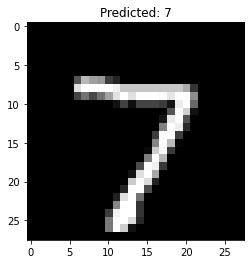

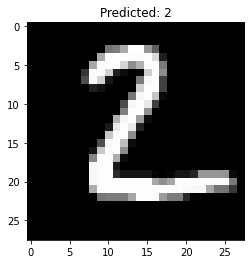

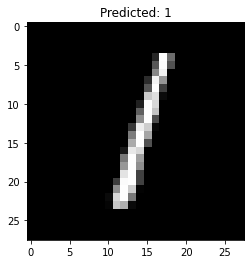

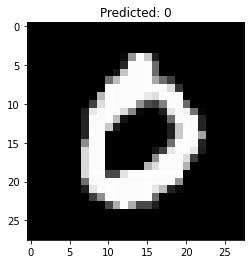

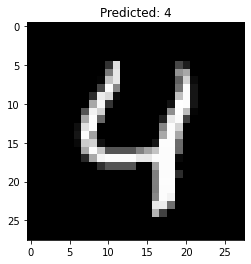

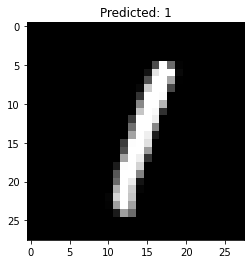

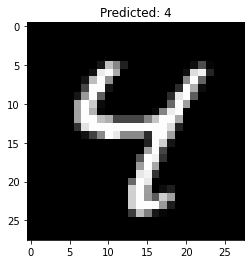

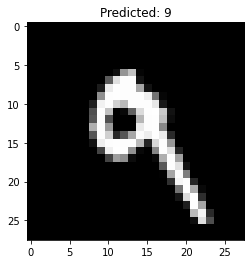

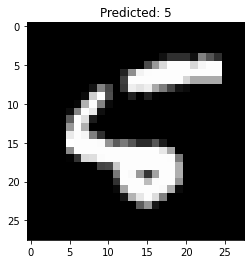

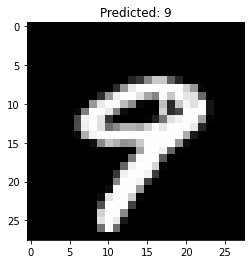

In [10]:
# Visualize the predictions
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.show()